In [5]:
# pandas and numpy import
import pandas as pd
import numpy as np

#sklearn imports
import sklearn
from sklearn import datasets, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#matplotlib
import matplotlib.pyplot as plt




Text(0, 0.5, 'Sepal width (cm)')

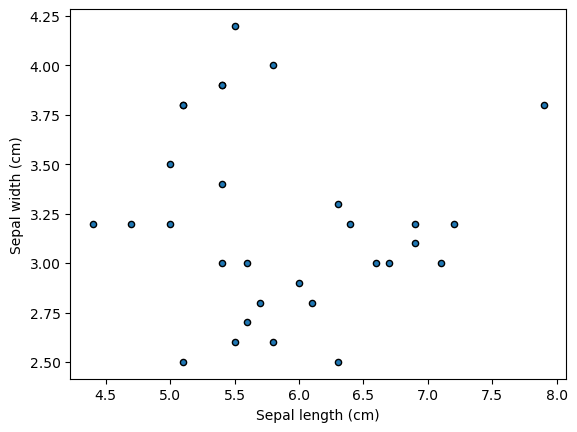

In [44]:
iris = datasets.load_iris()
data = pd.DataFrame(data = iris.data,  columns = iris.feature_names)
data['Class'] = iris.target_names[iris.target]

X = data.loc[:,'sepal length (cm)':'sepal width (cm)']
y = data['Class']

clf = KNeighborsClassifier(5)
clf.fit(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 1)

#had a bit of trouble with the scatter plot
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], edgecolor='k', s=20)

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')


Test accuracy: [0.56666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667]
Training accuracy: [0.69166667 0.95833333 0.98333333 0.99166667 1.         1.
 1.         1.         1.         1.        ]
Average test accuracy: 0.9266666666666667
Average training accuracy: 0.9625


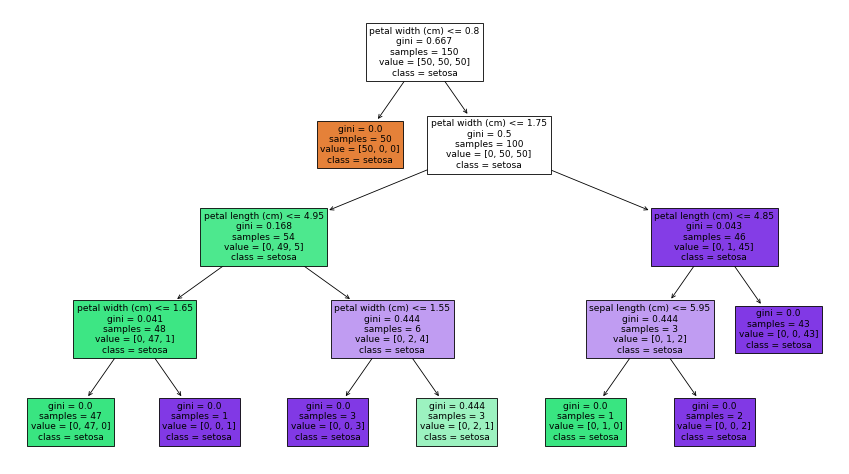

In [22]:
#setting up X and y variables
X = data.drop(['Class'], axis = 1)
y = data['Class']

#initialize decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(X,y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#return tree
fig, ax = plt.subplots(dpi=60, figsize=(18,10))
tree.plot_tree(clf, feature_names=X.columns.tolist(),  class_names= y.tolist(), filled=True)

out_file_name = 'iris_decison_tree'
fig.savefig(out_file_name)

#return prediction accuracy

maxdepths = [1,2,3,4,5,6,7,8,9,10]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    index += 1
print("Test accuracy: " + str(testAcc))
print("Training accuracy: " + str(trainAcc))

trainAvg = np.mean(trainAcc)
testAvg = np.mean(testAcc)

print("Average test accuracy: " + str(testAvg)) 
print("Average training accuracy: " + str(trainAvg))

In [24]:
print(X)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
